<a href="https://colab.research.google.com/github/saicharangadamshetti/Cricket-Highlights-Generation/blob/master/Colab%20books/VideoSegmentation_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import moviepy.editor as mp
video=mp.VideoFileClip('drive/My Drive/Processedvideo/RequiredVideo.mp4')
audio=video.audio
audio.write_audiofile("drive/My Drive/RequiredAudio.mp3")


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1777664/45929032 bytes (3.9%)5464064/45929032 bytes (11.9%)9281536/45929032 bytes (20.2%)12967936/45929032 bytes (28.2%)16408576/45929032 bytes (35.7%)20094976/45929032 bytes (43.8%)23912448/45929032 bytes (52.1%)27893760/45929032 bytes (60.7%)31768576/45929032 bytes (69.2%)35586048/45929032 bytes (77.5%)39493632/45929032 bytes (86.0%)43278336/45929032 bytes (94.2%)

100%|██████████| 65990/65990 [01:25<00:00, 771.22it/s]

[MoviePy] Done.


In [0]:
filename='drive/My Drive/RequiredAudio.mp3' 
import librosa 
x, sr = librosa.load(filename,sr=16000)

In [0]:
int(librosa.get_duration(x, sr)/60)
max_slice=5 
window_length = max_slice * sr

In [0]:
import IPython.display as ipd 
a=x[21*window_length:22*window_length] 
ipd.Audio(a, rate=sr)

In [0]:
energy = sum(abs(a**2))
print(energy)

124.80315080735285


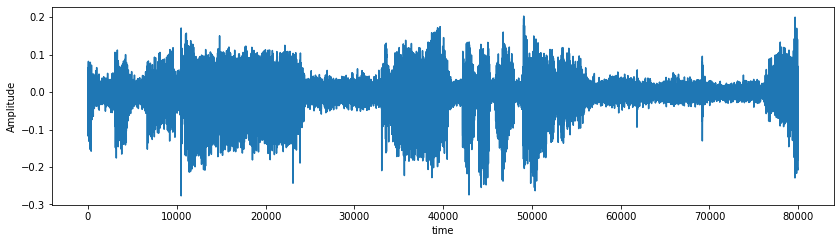

In [0]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(14, 8)) 
ax1 = fig.add_subplot(211) 
ax1.set_xlabel('time') 
ax1.set_ylabel('Amplitude') 
ax1.plot(a)

In [0]:
import numpy as np
energy = np.array([sum(abs(x[i:i+window_length]**2)) for i in range(0, len(x), window_length)])

In [0]:
energy

array([ 79.16001394,  71.9108387 ,  96.29734787, 101.75960828,
        97.57411513,  85.44411824,  83.69288358,  75.49970271,
        56.83203845, 103.54478084,  94.14918887,  57.88632393,
        74.31939898,  77.36112381,  52.69470581,  48.90430879,
        83.56190496,  69.53682279,  63.22433261, 112.67499127,
        94.06607152, 124.80315081,  32.39433826,  52.42424365,
        76.10014122,  58.74532761,  92.48053823,  91.36394455,
        74.19914187, 232.24744865, 249.17506279, 222.81076809,
       164.53101392, 146.39335244, 144.94353551, 107.29770359,
        74.8324339 ,  56.02200792,  76.19819558,  52.06759978,
       105.51789679,  77.22068551, 110.68289515,  71.86784752,
        78.27944198,  78.59110916,  75.09438062,  61.96021322,
        38.65035154,  24.00462375,  21.04751316,  32.65813887,
        62.88869643,  43.71201261,  32.40074562, 156.17847446,
       125.33830105, 130.70698912, 112.33080435,  98.10422952,
        96.37034593, 121.48936638,  26.4271763 ,  89.75

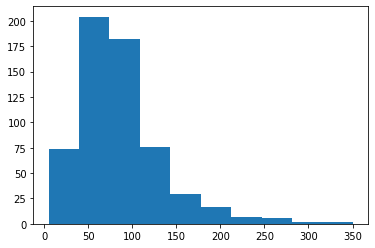

In [0]:
import matplotlib.pyplot as plt 
plt.hist(energy) 
plt.show()

In [0]:
import pandas as pd
df=pd.DataFrame(columns=['energy','start','end'])
thresh=180
row_index=0
for i in range(len(energy)):
    value=energy[i]
    if(value>=thresh):
        i=np.where(energy == value)[0]
        df.loc[row_index,'energy']=value
        df.loc[row_index,'start']=i[0] * 5
        df.loc[row_index,'end']=(i[0]+1) * 5
        row_index= row_index + 1

In [0]:
df

,energy,start,end
0,232.247,145,150
1,249.175,150,155
2,222.811,155,160
3,350.412,380,385
4,285.791,385,390
5,238.197,390,395
6,268.751,985,990
7,203.261,990,995
8,185.992,1055,1060
9,255.606,1060,1065


In [0]:
temp=[]
i=0
j=0
n=len(df) - 2
m=len(df) - 1
while(i<=n):
    j=i+1
    while(j<=m):
        if(df['end'][i] == df['start'][j]):
            df.loc[i,'end'] = df.loc[j,'end']
            temp.append(j)
            j=j+1
        else:
            i=j
            break

In [0]:
df

,energy,start,end
0,232.247,145,160
1,249.175,150,155
2,222.811,155,160
3,350.412,380,395
4,285.791,385,390
5,238.197,390,395
6,268.751,985,995
7,203.261,990,995
8,185.992,1055,1070
9,255.606,1060,1065


In [0]:
df.drop(temp,axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)
df

,energy,start,end
0,232.247,145,160
1,350.412,380,395
2,268.751,985,995
3,185.992,1055,1070
4,200.013,1110,1115
5,210.945,1145,1155
6,220.565,1250,1255
7,260.455,1505,1510
8,193.025,1765,1770
9,183.588,1830,1840


In [0]:
i=0
while i<len(df):
  df.loc[i,'start']=df.loc[i,'start']-5
  i=i+1
df

,energy,start,end
0,232.247,140,160
1,350.412,375,395
2,268.751,980,995
3,185.992,1050,1070
4,200.013,1105,1115
5,210.945,1140,1155
6,220.565,1245,1255
7,260.455,1500,1510
8,193.025,1760,1770
9,183.588,1825,1840


In [0]:
import moviepy.editor as mp
from moviepy.editor import VideoFileClip, concatenate_videoclips
video=mp.VideoFileClip('drive/My Drive/Processedvideo/RequiredVideo.mp4')

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)958464/45929032 bytes (2.1%)2678784/45929032 bytes (5.8%)5357568/45929032 bytes (11.7%)9412608/45929032 bytes (20.5%)13606912/45929032 bytes (29.6%)17743872/45929032 bytes (38.6%)22069248/45929032 bytes (48.1%)26451968/45929032 bytes (57.6%)30760960/45929032 bytes (67.0%)35143680/45929032 bytes (76.5%)39542784/45929032 bytes (86.1%)43999232/45929032 bytes (95.8%)45929

In [0]:
start=np.array(df['start'])
end=np.array(df['end'])
for i in range(len(df)):
    
    filename="drive/My Drive/Processedvideo/highlights/clip" + str(i+1) + ".mp4"
    clip=video.subclip(start[i],end[i])
    clip.write_videofile(filename)

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip1.mp4
[MoviePy] Writing audio in clip1TEMP_MPY_wvf_snd.mp3


100%|██████████| 442/442 [00:00<00:00, 777.61it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip1.mp4



100%|█████████▉| 600/601 [00:34<00:00, 17.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip1.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip2.mp4
[MoviePy] Writing audio in clip2TEMP_MPY_wvf_snd.mp3


100%|██████████| 442/442 [00:00<00:00, 670.96it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip2.mp4



100%|█████████▉| 600/601 [00:33<00:00, 17.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip2.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip3.mp4
[MoviePy] Writing audio in clip3TEMP_MPY_wvf_snd.mp3


100%|██████████| 331/331 [00:00<00:00, 740.44it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip3.mp4



100%|█████████▉| 450/451 [00:23<00:00, 18.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip3.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip4.mp4
[MoviePy] Writing audio in clip4TEMP_MPY_wvf_snd.mp3


100%|██████████| 442/442 [00:00<00:00, 644.21it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip4.mp4



100%|█████████▉| 600/601 [00:31<00:00, 18.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip4.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip5.mp4
[MoviePy] Writing audio in clip5TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 633.77it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip5.mp4



100%|█████████▉| 300/301 [00:14<00:00, 20.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip5.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip6.mp4
[MoviePy] Writing audio in clip6TEMP_MPY_wvf_snd.mp3


100%|██████████| 331/331 [00:00<00:00, 745.39it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip6.mp4



100%|█████████▉| 450/451 [00:23<00:00, 19.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip6.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip7.mp4
[MoviePy] Writing audio in clip7TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 667.93it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip7.mp4



100%|█████████▉| 300/301 [00:15<00:00, 18.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip7.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip8.mp4
[MoviePy] Writing audio in clip8TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 638.15it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip8.mp4



100%|█████████▉| 300/301 [00:14<00:00, 20.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip8.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip9.mp4
[MoviePy] Writing audio in clip9TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 682.27it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip9.mp4



100%|█████████▉| 300/301 [00:14<00:00, 20.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip9.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip10.mp4
[MoviePy] Writing audio in clip10TEMP_MPY_wvf_snd.mp3


100%|██████████| 331/331 [00:00<00:00, 678.86it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip10.mp4



100%|█████████▉| 450/451 [00:24<00:00, 18.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip10.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip11.mp4
[MoviePy] Writing audio in clip11TEMP_MPY_wvf_snd.mp3


100%|██████████| 442/442 [00:00<00:00, 472.24it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip11.mp4



100%|█████████▉| 600/601 [00:33<00:00, 17.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip11.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip12.mp4
[MoviePy] Writing audio in clip12TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 675.07it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip12.mp4



100%|█████████▉| 300/301 [00:15<00:00, 19.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip12.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip13.mp4
[MoviePy] Writing audio in clip13TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 700.44it/s]

[MoviePy] Done.


[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip13.mp4


100%|█████████▉| 300/301 [00:12<00:00, 24.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip13.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip14.mp4
[MoviePy] Writing audio in clip14TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 661.47it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip14.mp4



100%|█████████▉| 300/301 [00:14<00:00, 20.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip14.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip15.mp4
[MoviePy] Writing audio in clip15TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 680.66it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip15.mp4



100%|█████████▉| 300/301 [00:14<00:00, 20.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip15.mp4 

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlights/clip16.mp4
[MoviePy] Writing audio in clip16TEMP_MPY_wvf_snd.mp3


100%|██████████| 442/442 [00:00<00:00, 773.22it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlights/clip16.mp4



100%|█████████▉| 600/601 [00:31<00:00, 18.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlights/clip16.mp4 



In [0]:
import os
from moviepy.editor import VideoFileClip, concatenate_videoclips
clip_name = os.listdir('drive/My Drive/Processedvideo/highlights')
final_clip = VideoFileClip("drive/My Drive/Processedvideo/highlights/clip1.mp4")
for name in clip_name[1:]:
    print(name)
    #clip1 = VideoFileClip('drive/My Drive/Processedvideo/highlights/'+name)
    #final_clip = concatenate_videoclips([final_clip,clip1])
#final_clip.write_videofile("drive/My Drive/Processedvideo/highlights/Highlightfinal.mp4")

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)720896/45929032 bytes (1.6%)2080768/45929032 bytes (4.5%)4038656/45929032 bytes (8.8%)6864896/45929032 bytes (14.9%)10797056/45929032 bytes (23.5%)14819328/45929032 bytes (32.3%)18890752/45929032 bytes (41.1%)23273472/45929032 bytes (50.7%)27656192/45929032 bytes (60.2%)32022528/45929032 bytes (69.7%)36331520/45929032 bytes (79.1%)40624128/45929032 bytes (88.4%)4492492

In [0]:
clip1 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip1.mp4')
clip2 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip2.mp4')
clip3 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip3.mp4')
clip4 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip4.mp4')
clip5 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip5.mp4')
clip6 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip6.mp4')
clip7 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip7.mp4')
clip8 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip8.mp4')
clip9 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip9.mp4')
clip10 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip10.mp4')
clip11 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip11.mp4')
clip12 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip12.mp4')
clip13 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip13.mp4')
clip14 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip14.mp4')
clip15 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip15.mp4')
clip16 = VideoFileClip('drive/My Drive/Processedvideo/highlights/clip16.mp4')
clip17= VideoFileClip('drive/My Drive/Processedvideo/highlights/clip17.mp4')

In [0]:
final_clip = concatenate_videoclips([clip1,clip2,clip3,clip4,clip5,clip6,clip7,clip8,clip9,clip10,clip11,clip12,clip13,clip14,clip15,clip16,clip17])
final_clip.write_videofile("drive/My Drive/Processedvideo/highlightsfinal.mp4")

[MoviePy] >>>> Building video drive/My Drive/Processedvideo/highlightsfinal.mp4
[MoviePy] Writing audio in highlightsfinalTEMP_MPY_wvf_snd.mp3


100%|██████████| 5262/5262 [00:05<00:00, 981.75it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Processedvideo/highlightsfinal.mp4



100%|██████████| 7159/7159 [06:44<00:00, 17.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Processedvideo/highlightsfinal.mp4 

